<a href="https://colab.research.google.com/github/mchype99/python-notebooks/blob/main/perception-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 3

CAP 4613

McKerlton Hyppolite

https://colab.research.google.com/drive/1tCYLPQ34BnqMR-vIodVF6NfQicX7dGA9?usp=sharing

Problem 2) Perception learning in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

class NeuralNetwork(object):
    def __init__(self, num_params=2):
        #np.random.seed(1)
        # 3x1 Weight matrix
        self.weight_matrix = 2 * np.random.random((num_params+1, 1)) - 1

        self.l_rate = 1

    def hard_limiter(self, x):
        outs = np.zeros(x.shape)
        outs[x>=0] = 1
        return outs

    # assuming each input vector is of shape 2 as weight vector size is 3 (including bias)
    def forward_propagation(self, inputs):
        outs = np.dot(inputs, self.weight_matrix)
        return self.hard_limiter(outs)

    def train(self, train_inputs, train_outputs, num_train_iterations=1000):
        for iteration in range(num_train_iterations):
            for i in range(train_inputs.shape[0]):
                pred_i = self.pred(train_inputs[i,:])
                if pred_i != train_outputs[i]:
                  output = self.forward_propagation(train_inputs[i,:])
                  #Calculate the error in the output
                  error = train_outputs[i] - output
                  adjustment = self.l_rate*error*train_inputs[i]
                  #Adjust the weight matrix
                  self.weight_matrix[:,0] += adjustment
                  #plot the seperating the line based on the weights
                  print('Iteration #' +str(iteration))
                  plot_fun_thr(train_inputs[:,1:3], train_outputs, self.weight_matrix[:,0], classes)

    def pred(self, inputs):
        prob = self.forward_propagation(inputs)
        preds = np.int8(prob>=0.5)
        #preds = self.forward_propagation(inputs)
        return preds

def plot_fun(features, labels, classes):
    plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'b^')
    plt.axis([-3,3,-3,3])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
    plt.show()

def plot_fun_thr(features, labels, thre_parms, classes):
    plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'b^')
    plt.axis([-3,3,-3,3])
    x1 = np.linspace(-3, 3, 50)
    x2 = -(thre_parms[1]*x1+thre_parms[0])/thre_parms[2]
    plt.plot(x1, x2, '-r')
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
    plt.show()

Array of inputs:
[[ 2  0]
 [ 2  1]
 [ 0  0]
 [-2  0]]

Desired label of data points:
[1 0 1 0]

Plot given data points:


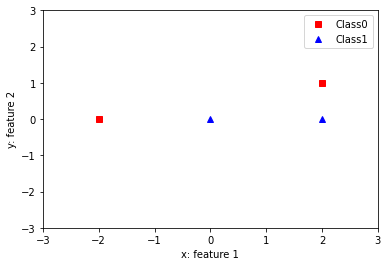

In [ ]:
features = np.array([[2,0], [2,1], [0,0], [-2,0]])
print('Array of inputs:')
print(features)
labels = np.array([1,0,1,0])
print('\nDesired label of data points:')
print(labels)
classes=[0,1]

print('\nPlot given data points:')
plot_fun(features, labels, classes)

In [ ]:
bias = np.ones((features.shape[0], 1))

features = np.append(bias, features, axis = 1)
print('\nAdd bias to input:')
print(features)


Add bias to input:
[[ 1.  2.  0.]
 [ 1.  2.  1.]
 [ 1.  0.  0.]
 [ 1. -2.  0.]]


Random weights at the start of training:
[[-0.0672392 ]
 [-0.34597868]
 [ 0.00985945]]
Iteration #0


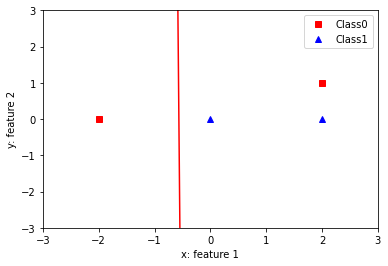

Iteration #0


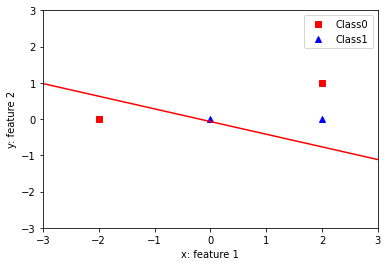

Iteration #0


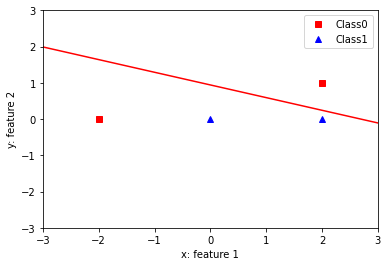

Iteration #0


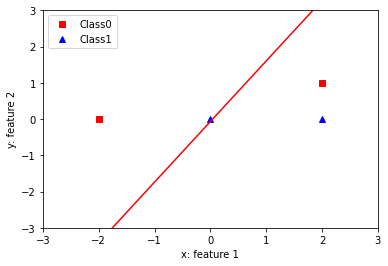

Iteration #1


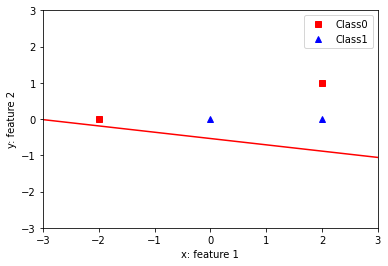

Iteration #1


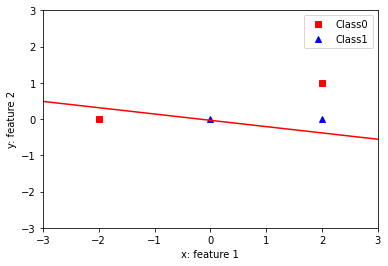

Iteration #1


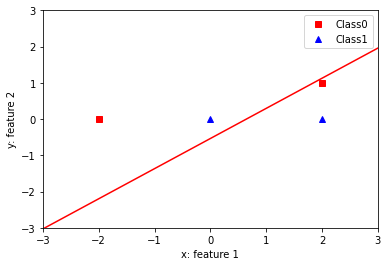

Iteration #2


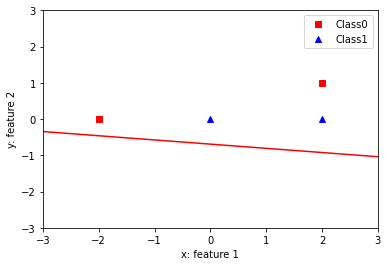

Iteration #2


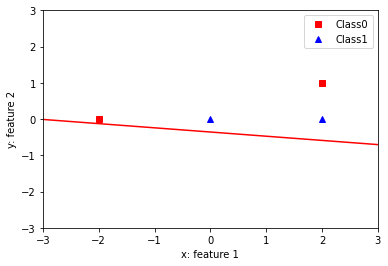

Iteration #3


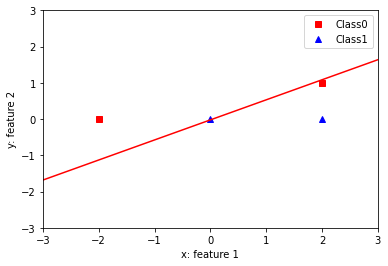

Iteration #3


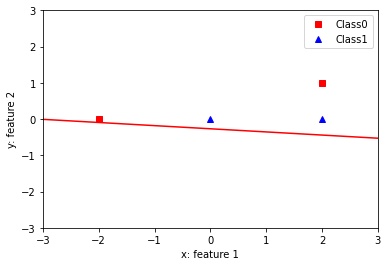

Iteration #3


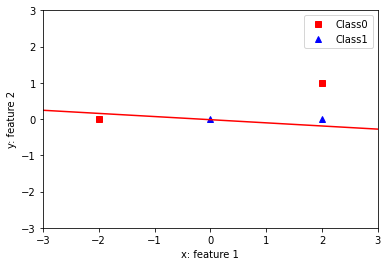

Iteration #3


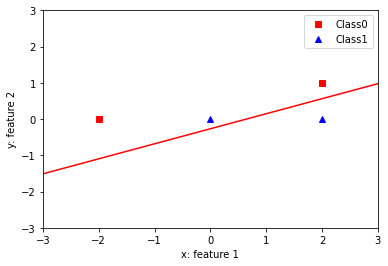

Iteration #4


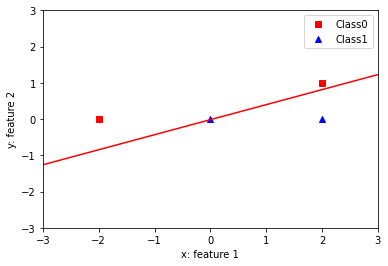

Iteration #5


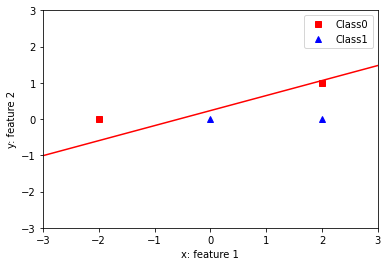

Iteration #6


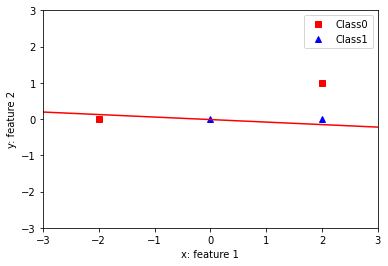

Iteration #6


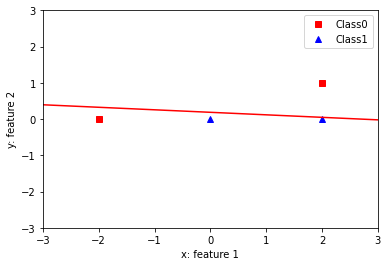

Iteration #6


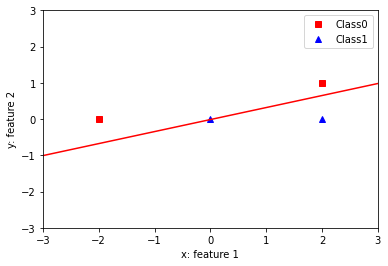

Iteration #7


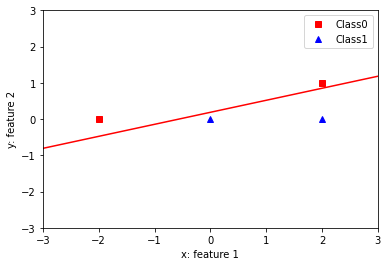

New weights after training:
[[ 0.9327608 ]
 [ 1.65402132]
 [-4.99014055]]

Classify data points with trained perceptron:
[[1]
 [0]
 [1]
 [0]]


In [ ]:
neural_network = NeuralNetwork(2)
print('Random weights at the start of training:')
print(neural_network.weight_matrix)
neural_network.train(features, labels, 100)

print('New weights after training:')
print(neural_network.weight_matrix)

#Test the neural network with training data points.
print('\nClassify data points with trained perceptron:')
print(neural_network.pred(features))